In [38]:
from pathlib import Path
import os, sys
import os.path as path
import importlib
import numpy as np
import pandas as pd

import matplotlib.patheffects as path_effects
import matplotlib.pyplot as plt
import nibabel
import json

from nilearn import plotting, image
from nilearn.glm.first_level import FirstLevelModel
from nilearn.reporting import make_glm_report
from nilearn.plotting import plot_design_matrix
from nilearn.plotting import plot_contrast_matrix
from nilearn.plotting import plot_event
from nilearn.glm.first_level import make_first_level_design_matrix

In [5]:
# Move up to the project root
project_root = '/project/6019337/vvakorin/sdata2/religion_fmri/'
os.chdir(project_root)
os.getcwd()

'/project/6019337/vvakorin/sdata2/religion_fmri'

In [29]:
# Ensure __file__ is an absolute path
# __file__ = os.path.realpath(__file__)    # expand potentially relative path to a full one

# Lambda function to generate full file paths
# pathname = lambda fname: os.path.join(os.path.dirname(__file__), fname)

# Function to generate full file paths based on the current working directory
pathname = lambda fname: os.path.join(Path.cwd(), fname)

# Append src to the Python path
sys.path.append(pathname('src'))

In [25]:
pathname('src')

'/project/6019337/vvakorin/sdata2/religion_fmri/src'

In [57]:
# import utils_fmri_imgs_events
importlib.reload(utils_fmri_imgs_events)
# Import the function from the module
# from utils_fmri_imgs_events import get_fmri_imgs_events

<module 'utils_fmri_imgs_events' from '/project/6019337/vvakorin/sdata2/religion_fmri/src/utils_fmri_imgs_events.py'>

In [31]:
print(sys.path)

['/project/6019337/vvakorin/sdata2/religion_fmri/notebooks', '', '/cvmfs/soft.computecanada.ca/easybuild/python/site-packages', '/cvmfs/soft.computecanada.ca/custom/python/site-packages', '/cvmfs/soft.computecanada.ca/easybuild/software/2023/x86-64-v3/Compiler/gcccore/python/3.11.5/lib/python311.zip', '/cvmfs/soft.computecanada.ca/easybuild/software/2023/x86-64-v3/Compiler/gcccore/python/3.11.5/lib/python3.11', '/cvmfs/soft.computecanada.ca/easybuild/software/2023/x86-64-v3/Compiler/gcccore/python/3.11.5/lib/python3.11/lib-dynload', '/home/vvakorin/python-virtual-environments/jupyter_py3/lib/python3.11/site-packages', '/cvmfs/soft.computecanada.ca/easybuild/software/2023/x86-64-v3/Compiler/gcc12/vtk/9.3.0/lib/python3.11/site-packages', '/cvmfs/soft.computecanada.ca/easybuild/software/2023/x86-64-v3/Compiler/gcc12/netcdf/4.9.2/lib/python3.11/site-packages', '/cvmfs/soft.computecanada.ca/easybuild/software/2023/x86-64-v3/Compiler/gcc12/hdf5/1.14.2/lib/python3.11/site-packages', '/cvmfs/s

In [103]:
importlib.reload(utils_fmri_imgs_events)

subject_id = 'sub-45TDGV'
data_root = '/project/6019337/databases/religion/bids/'
runs_id = [1,2,3] # Runs (1,2,3)

fmri_imgs = utils_fmri_imgs_events.get_mni_fmri_imgs(
    subject_id=subject_id,
    data_root=data_root,
    runs_id=runs_id
)

event_matrices = utils_fmri_imgs_events.get_events_from_bids(
    subject_id=subject_id,
    data_root=data_root,
    runs_id=runs_id
)

rt_times, rt = utils_fmri_imgs_events.get_mni_fmri_rt(
    subject_id=subject_id,
    data_root=data_root,
    runs_id=runs_id
)

['/project/6019337/databases/religion/bids/preprocessed_23.1.3/sub-45TDGV/ses-1/func/sub-45TDGV_ses-1_task-image_run-1_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz', '/project/6019337/databases/religion/bids/preprocessed_23.1.3/sub-45TDGV/ses-1/func/sub-45TDGV_ses-1_task-image_run-2_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz', '/project/6019337/databases/religion/bids/preprocessed_23.1.3/sub-45TDGV/ses-1/func/sub-45TDGV_ses-1_task-image_run-3_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz']
All files exist.
['/project/6019337/databases/religion/bids/main/sub-45TDGV/ses-1/func/sub-45TDGV_ses-1_task-image_run-1_events.tsv', '/project/6019337/databases/religion/bids/main/sub-45TDGV/ses-1/func/sub-45TDGV_ses-1_task-image_run-2_events.tsv', '/project/6019337/databases/religion/bids/main/sub-45TDGV/ses-1/func/sub-45TDGV_ses-1_task-image_run-3_events.tsv']
All files exist.
Updated Event Matrix for Run 1:
       onset  duration         trial_type
0   0.000000       1.0      q

In [107]:
# Define the FirstLevelModel with appropriate parameters
hrf_model='glover'
drift_model='cosine'

fmri_glm = FirstLevelModel(
    t_r=t_r,                      # Repetition time of the fMRI scans
    hrf_model=hrf_model,           # Hemodynamic response function model
    drift_model=drift_model,         # Model of low-frequency drifts
    high_pass=0.01,               # High-pass filter cutoff in Hz
    smoothing_fwhm=5.0,           # Spatial smoothing in millimeters
    noise_model='ar1',            # Autoregressive noise model
    signal_scaling=0,             # Scaling the signal (0 means no scaling)
    n_jobs=-1,                     # Number of CPUs to use, -1 for all
    verbose=1                     # Verbosity level (0: no message, 1: progress messages)
)
print("The GLM model has been defined.") 

The GLM model has been defined.


In [89]:
importlib.reload(utils_fmri_imgs_events)
print('okay')

design_matrices = utils_fmri_imgs_events.get_mni_fmri_design_matrices(
    fmri_imgs=fmri_imgs,
    event_matrices=event_matrices,
    rt_times=rt_times,
    hrf_model=hrf_model,
    drift_model=drift_model,
    high_pass=0.01,
    drift_order=3
)
print('okay')

okay
The repetition time is: 1.66


/home/vvakorin/python-virtual-environments/jupyter_py3/lib/python3.11/site-packages/nilearn/glm/first_level/experimental_paradigm.py:142: UserWarning: The following conditions contain events with null duration:
response:1, response:3, response:4, response:2.
  warnings.warn(


The repetition time is: 1.66


/home/vvakorin/python-virtual-environments/jupyter_py3/lib/python3.11/site-packages/nilearn/glm/first_level/experimental_paradigm.py:142: UserWarning: The following conditions contain events with null duration:
response:1, response:4, response:2, response:3.
  warnings.warn(


The repetition time is: 1.66
okay


/home/vvakorin/python-virtual-environments/jupyter_py3/lib/python3.11/site-packages/nilearn/glm/first_level/experimental_paradigm.py:142: UserWarning: The following conditions contain events with null duration:
response:1, response:4, response:3, response:2.
  warnings.warn(


/home/vvakorin/python-virtual-environments/jupyter_py3/lib/python3.11/site-packages/nilearn/plotting/matrix_plotting.py:503: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_373831/2165553245.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


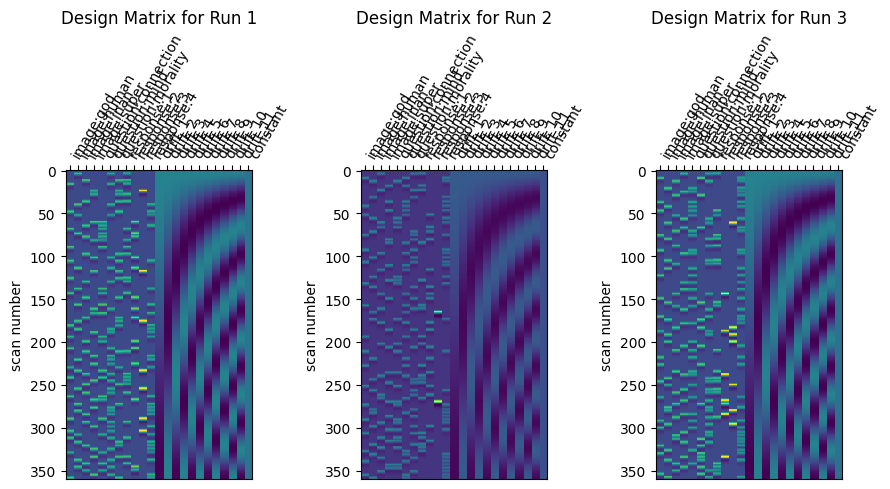

In [104]:
# Visualzie the design matrices for three runs
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(9, 5))

for run_id, design_matrix in enumerate(design_matrices, start=1):
    ax = axes[run_id - 1]  # Select the appropriate subplot
    plot_design_matrix(design_matrix, ax=ax)
    ax.set_title(f'Design Matrix for Run {run_id}')

plt.tight_layout()
plt.show()

In [105]:
importlib.reload(utils_fmri_imgs_events)

# We can just define the contrast array for one run and assume
# that the design matrix is the same for the other.
# However, if we want to be safe, we should define each contrast separately,
# and provide it as a list.
contrast_id = "+1:image:god-1:image:human"
contrast_val = utils_fmri_imgs_events.get_contrast_design_matrices(design_matrices, contrast_id)

okay


In [106]:
importlib.reload(utils_fmri_imgs_events)
print(contrast_val)
contrasts = utils_fmri_imgs_events.make_localizer_contrasts(design_matrices[0])

[array([ 1., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]), array([ 1., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]), array([ 1., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])]


In [110]:
fmri_glm_multirun = fmri_glm.fit(fmri_imgs, events=event_matrices)

print('Number crunching starts ...')
z_map = fmri_glm_multirun.compute_contrast(
    contrast_def=contrast_val,
    output_type="z_score",
)
print('Number crunching has been completed.')

Computing run 1 out of 3 runs (go take a coffee, a big one)
/home/vvakorin/python-virtual-environments/jupyter_py3/lib/python3.11/site-packages/nilearn/glm/first_level/experimental_paradigm.py:142: UserWarning: The following conditions contain events with null duration:
response:1, response:3, response:4, response:2.
  warnings.warn(
Computing run 2 out of 3 runs (32 seconds remaining)
/home/vvakorin/python-virtual-environments/jupyter_py3/lib/python3.11/site-packages/nilearn/glm/first_level/experimental_paradigm.py:142: UserWarning: The following conditions contain events with null duration:
response:1, response:4, response:2, response:3.
  warnings.warn(
Computing run 3 out of 3 runs (15 seconds remaining)
/home/vvakorin/python-virtual-environments/jupyter_py3/lib/python3.11/site-packages/nilearn/glm/first_level/experimental_paradigm.py:142: UserWarning: The following conditions contain events with null duration:
response:1, response:4, response:3, response:2.
  warnings.warn(

Compu

Number crunching starts ...
Number crunching has been completed.


In [109]:
contrast_val

[array([ 1., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 array([ 1., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 array([ 1., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])]

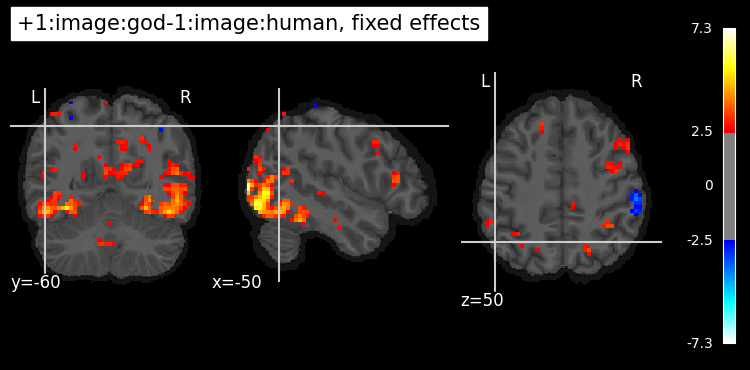

In [113]:
# Define the path to the NIFTI file
subjects_dir = "/project/6019337/databases/religion/bids/preprocessed_23.1.3/"
subject = "sub-45TDGV"
t1_fname = os.path.join(subjects_dir, subject, "ses-1", "anat", "sub-45TDGV_ses-1_space-MNI152NLin2009cAsym_desc-preproc_T1w.nii.gz")

# Load the NIFTI file as a Niimg-like object
#t1_img = image.load_img(t1_fname)

cut_coords = [-50, -60, 50]

plotting.plot_stat_map(
    z_map,
    bg_img=t1_fname,
    threshold=2.5,
    cut_coords=cut_coords,
    title=f"{contrast_id}, fixed effects",
)

plotting.show()

In [ ]:
# Construct the output path with the contrast_id
zmap_fname_out = os.path.join(
    project_root,
    'data',
    'zmaps',
    'ses-1/func',
    f"{subject_id}_ses-1_task-image_run-{run_id}_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz"
)

folder_out = "/project/6019337/vvakorin/sdata3/religion/zmaps/"
fname_out = f"zmap_{subject_id}_fixed_{contrast_id}.nii.gz"
zmap_fname_out = os.path.join(folder_out, fname_out)

# Save the z_map image to the specified location
nibabel.save(z_map, zmap_fname_out)